In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [77]:
# Basics
import tensorflow as tf
import pandas as pd
import xarray as xr

# Helpful
from tqdm import tqdm

# Visualization
import matplotlib.pyplot as plt

# My Methods
from src.utils.CRPS import *  # CRPS metrics
from src.utils.data_split import *  # Splitting data into X and y
from src.utils.drn_make_X_array import *  # Import make train array functions (make_X_array)
from src.models.EMOS import *  # EMOS implementation
from src.models.DRN.DRN_model import *  # DRN implementation
from src.models.DRN.DRN_load_score import *  # Load DRN_scores
from src.models.DRN.DRN_load_model import *  # Load Models
from src.models.DRN.DRN_train import *
from src.models.EMOS_local.EMOS_local_load_score import *  # Load EMOS_local_scores
from src.models.EMOS_global.EMOS_global_load_score import *  # Load EMOS_global_scores
from src.models.EMOS_global.EMOS_global_load_model import *  # Load EMOS_global_models#
import data.raw.load_data_raw as ldr  # Load raw data
import data.processed.load_data_processed as ldp  # Load processed data normed
import data.processed.load_data_processed_denormed as ldpd  # Load processed data denormed
from src.models.CRPS_baseline.CRPS_load import *  # Load CRPS scores

<IPython.core.display.Javascript object>

### 0. Setup

In [3]:
run = 0
path = f"/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_{run}.csv"
df_DRN_hyper_scores_0 = pd.read_csv(path)

<IPython.core.display.Javascript object>

In [4]:
run = 1
path = f"/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_{run}.csv"
df_DRN_hyper_scores_1 = pd.read_csv(path)

<IPython.core.display.Javascript object>

In [64]:
run = 2
path = f"/Data/Delong_BA_Data/scores/DRN_hyper_scores/DRN_hyper_scores_dataframe_5_run_{run}.csv"
df_DRN_hyper_scores_2 = pd.read_csv(path)

<IPython.core.display.Javascript object>

### 1. Functions

In [5]:
def df_split_lead(df):
    return [
        df.loc[df["lead_time"] == 0],
        df.loc[df["lead_time"] == 15],
        df.loc[df["lead_time"] == 30],
    ]

<IPython.core.display.Javascript object>

In [65]:
df_DRN_hyper_split_0 = df_split_lead(df_DRN_hyper_scores_0)
df_DRN_hyper_split_1 = df_split_lead(df_DRN_hyper_scores_1)
df_DRN_hyper_split_2 = df_split_lead(df_DRN_hyper_scores_2)

<IPython.core.display.Javascript object>

#### Run 0

In [14]:
df_DRN_hyper_split_0[0].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
8,0,[],5,1024,30,0.005,Adam,relu,0.555016
5,0,[],5,512,30,0.005,Adam,relu,0.555110
17,0,[],10,1024,30,0.005,Adam,relu,0.555141
7,0,[],5,1024,30,0.010,Adam,relu,0.555490
26,0,[],15,1024,30,0.005,Adam,relu,0.555579


<IPython.core.display.Javascript object>

In [15]:
df_DRN_hyper_split_0[1].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
35,15,[],5,1024,30,0.005,Adam,relu,1.100667
44,15,[],10,1024,30,0.005,Adam,relu,1.100702
41,15,[],10,512,30,0.005,Adam,relu,1.100864
53,15,[],15,1024,30,0.005,Adam,relu,1.100892
32,15,[],5,512,30,0.005,Adam,relu,1.100895


<IPython.core.display.Javascript object>

In [16]:
df_DRN_hyper_split_0[2].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
65,30,[],10,256,30,0.005,Adam,relu,1.391657
77,30,[],15,512,30,0.005,Adam,relu,1.391763
71,30,[],10,1024,30,0.005,Adam,relu,1.391784
62,30,[],5,1024,30,0.005,Adam,relu,1.392059
68,30,[],10,512,30,0.005,Adam,relu,1.392120


<IPython.core.display.Javascript object>

In [13]:
df_DRN_hyper_split_0[0]

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
0,0,[],5,256,30,0.050,Adam,relu,0.564222
1,0,[],5,256,30,0.010,Adam,relu,0.555739
2,0,[],5,256,30,0.005,Adam,relu,0.556146
3,0,[],5,512,30,0.050,Adam,relu,0.562363
4,0,[],5,512,30,0.010,Adam,relu,0.556169
5,0,[],5,512,30,0.005,Adam,relu,0.555110
6,0,[],5,1024,30,0.050,Adam,relu,0.557797
7,0,[],5,1024,30,0.010,Adam,relu,0.555490
8,0,[],5,1024,30,0.005,Adam,relu,0.555016
9,0,[],10,256,30,0.050,Adam,relu,0.561774


<IPython.core.display.Javascript object>

#### Run 1

In [36]:
df_DRN_hyper_split_1[0].sort_values("score").head(10)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
71,0,"[512, 256]",10,2048,20,0.001,Adam,relu,0.402245
65,0,"[512, 256]",10,512,20,0.001,Adam,relu,0.402706
68,0,"[512, 256]",10,1024,20,0.001,Adam,relu,0.402981
53,0,[1024],10,2048,20,0.001,Adam,relu,0.403361
47,0,[1024],10,512,20,0.001,Adam,relu,0.404008
35,0,[512],10,2048,20,0.001,Adam,relu,0.404025
59,0,"[512, 256]",5,1024,20,0.001,Adam,relu,0.404065
17,0,[256],10,2048,20,0.001,Adam,relu,0.404100
50,0,[1024],10,1024,20,0.001,Adam,relu,0.404119
32,0,[512],10,1024,20,0.001,Adam,relu,0.404282


<IPython.core.display.Javascript object>

In [23]:
df_DRN_hyper_split_1[1].sort_values("score").head(10)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
98,15,[512],5,2048,20,0.001,Adam,relu,1.068119
95,15,[512],5,1024,20,0.001,Adam,relu,1.068139
125,15,[1024],10,2048,20,0.001,Adam,relu,1.068411
110,15,[1024],5,512,20,0.001,Adam,relu,1.068769
80,15,[256],5,2048,20,0.001,Adam,relu,1.068930
77,15,[256],5,1024,20,0.001,Adam,relu,1.069026
143,15,"[512, 256]",10,2048,20,0.001,Adam,relu,1.069077
113,15,[1024],5,1024,20,0.001,Adam,relu,1.069098
89,15,[256],10,2048,20,0.001,Adam,relu,1.069183
134,15,"[512, 256]",5,2048,20,0.001,Adam,relu,1.069197


<IPython.core.display.Javascript object>

In [27]:
df_DRN_hyper_split_1[2].sort_values("score").head(40)

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
188,30,[1024],5,2048,20,0.001,Adam,relu,1.381914
152,30,[256],5,2048,20,0.001,Adam,relu,1.381981
153,30,[256],10,512,20,0.010,Adam,relu,1.382001
170,30,[512],5,2048,20,0.001,Adam,relu,1.382181
151,30,[256],5,2048,20,0.005,Adam,relu,1.382278
155,30,[256],10,512,20,0.001,Adam,relu,1.382289
176,30,[512],10,1024,20,0.001,Adam,relu,1.382354
158,30,[256],10,1024,20,0.001,Adam,relu,1.382717
183,30,[1024],5,1024,20,0.010,Adam,relu,1.382828
145,30,[256],5,512,20,0.005,Adam,relu,1.382975


<IPython.core.display.Javascript object>

#### Heatmaps

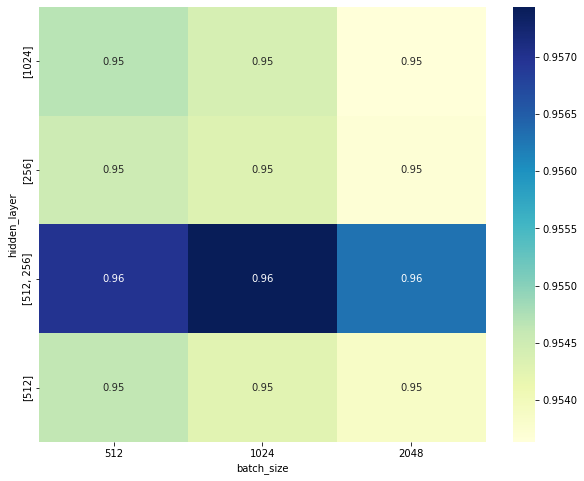

<IPython.core.display.Javascript object>

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by your hyperparameters and take the mean of the scores.
grouped_df = (
    df_DRN_hyper_scores_1.groupby(["hidden_layer", "batch_size"]).mean().reset_index()
)


# Pivot your dataframe to create a 2D grid. Replace 'hyperparameter1' and 'hyperparameter2' with actual column names.
pivot_df = grouped_df.pivot("hidden_layer", "batch_size", "score")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap="YlGnBu", annot=True)
plt.show()

#### Run 2

In [66]:
df_DRN_hyper_split_2[0].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
2,0,[1024],10,2048,30,0.001,Adam,relu,0.402879
1,0,[1024],10,2048,20,0.001,Adam,relu,0.402974
0,0,[1024],10,2048,10,0.001,Adam,relu,0.403705


<IPython.core.display.Javascript object>

In [67]:
df_DRN_hyper_split_2[1].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
5,15,[1024],10,2048,30,0.001,Adam,relu,1.068440
4,15,[1024],10,2048,20,0.001,Adam,relu,1.068467
3,15,[1024],10,2048,10,0.001,Adam,relu,1.068864


<IPython.core.display.Javascript object>

In [68]:
df_DRN_hyper_split_2[2].sort_values("score").head()

,lead_time,hidden_layer,emb_size,batch_size,epochs,lr,optimizer,activation,score
7,30,[1024],10,2048,20,0.001,Adam,relu,1.381906
8,30,[1024],10,2048,30,0.001,Adam,relu,1.383234
6,30,[1024],10,2048,10,0.001,Adam,relu,1.383297


<IPython.core.display.Javascript object>

#### Load models and test

In [ ]:
DRN_ws10_models = DRN_load_model("ws10")

In [53]:
# load train and test data
train_var_denormed = ldpd.load_data_all_train_proc_denorm()
dat_X_train_lead_all_denorm, dat_y_train_lead_all_denorm = split_var_lead(
    train_var_denormed
)
drn_X_train_lead_array, drn_embedding_train_lead_array = make_X_array(
    dat_X_train_lead_all_denorm, 0
)
# Reshape target values into a 1D array
t2m_y_train = dat_y_train_lead_all_denorm[5][0].values.flatten()

<IPython.core.display.Javascript object>

In [ ]:
# load test data
test_var_denormed = ldpd.load_data_all_test_proc_denorm()
dat_X_test_lead_all_denorm, dat_y_test_lead_all_denorm = split_var_lead(
    test_var_denormed
)
drn_X_test_lead_array, drn_embedding_test_lead_array = make_X_array(
    dat_X_test_lead_all_denorm, 0
)
# Reshape target values into a 1D array
t2m_y_test = dat_y_test_lead_all_denorm[5][0].values.flatten()


#### Try to train a model

In [80]:
DRN_0_model_test = DRN_train(
    5,
    0,
    hidden_layer=[1024],
    emb_size=10,
    batch_size=2048,
    epochs=1,
    lr=0.001,
    save=False,
)

8708/8708 [==============================] - 70s 8ms/step - loss: 0.4694 - val_loss: 0.4100


<IPython.core.display.Javascript object>

In [81]:
DRN_0_test_score = DRN_0_model_test.evaluate(
    [drn_X_test_lead_array, drn_embedding_test_lead_array], t2m_y_test
)

AttributeError: 'NoneType' object has no attribute 'evaluate'

<IPython.core.display.Javascript object>

In [70]:
drn_X_test_lead_array.mean()

0.3451736277745244

<IPython.core.display.Javascript object>

In [71]:
drn_X_train_lead_array.mean()

0.342875218816108

<IPython.core.display.Javascript object>

In [72]:
t2m_y_test.mean()

5.6563444

<IPython.core.display.Javascript object>

In [73]:
t2m_y_train.mean()

5.8420424

<IPython.core.display.Javascript object>

In [59]:
DRN_train_preds = DRN_ws10_models[0].evaluate(
    [drn_X_train_lead_array, drn_embedding_train_lead_array], t2m_y_train
)

696638/696638 [==============================] - 873s 1ms/step - loss: 0.3942


<IPython.core.display.Javascript object>

In [63]:
DRN_test_score = DRN_ws10_models[0].evaluate(
    [drn_X_test_lead_array, drn_embedding_test_lead_array], t2m_y_test
)

174038/174038 [==============================] - 220s 1ms/step - loss: 0.6162


<IPython.core.display.Javascript object>